# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №2

## №1 (20 баллов)

- Допустим, у нас есть подобная регрессия (допустим, что мы центрировали переменные):
$
y = \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + u
$
- Однако, наш $X_2$ абсолютно линейно зависит от $X_1$:
$
X_2 = \mu \cdot X_1
$

- Выразите через $X_1$:  
    - $
\sum{X_2^2} = \sum{\mu^2X_1^2} = \mu^2\sum{X_1^2}
$
    - $
\sum{(X_2 \cdot y)} = \mu \sum{(X_1 \cdot y)}
$
    - $
\sum{(X_1 \cdot X_2)} = \mu\sum{X_1^2}
$

- А теперь выразите $\beta_2$, зная формулу для нее в случае регрессии с двумя переменными, через $X_1$
$$
\beta_1 = \frac{\sum{X_1 \cdot y} \cdot \sum{X_2^2} - \sum{X_2 \cdot y} \cdot \sum{X_1 \cdot X_2}}{\sum{X_1^2} \cdot \sum{X_2^2} - (\sum{X_1 \cdot X_2})^2} = \frac{\sum{X_1 \cdot y} \cdot \mu^2\sum{X_1^2} - \mu\sum{X_1 \cdot y} \cdot \mu\sum{X_1 \cdot X_1}}{\sum{X_1^2} \cdot \mu^2\sum{X_1^2} - \mu^2(\sum{X_1 \cdot X_1})^2} = \frac00
$$

- Что вы можете сказать? Что произошло с коэффициентом?

У нас возникла неопределенность вида 0/0, это говорит нам о том, что нельза определенно сказать чему будет равен коэффициент, что для нас плохо.

## №2 (20 баллов)

- Давайте разберем такой замечательный пример из статьи [Stambaugh (1999)](https://repository.upenn.edu/fnce_papers/367/)
- Суть достаточно простая. Когда мы пытаемся предсказать доходности ценных бумаг (например, акций) с помощью регрессоров, которые весьма постоянны во времени (например, дивидендная доходность, которая редко меняется, т.к. компании редко сильно меняют свою дивидендную политику, чтобы не отпугнуть инвесторов), то мы получаем смещение наших оценок коэффициентов для регрессии доходности
- У нас есть:
$$
r_t = \alpha + x_{t-1} \cdot \beta + \varepsilon_t \\ 
x_t = \theta + x_{t-1} \cdot \gamma + u_t \\ 
\varepsilon_t = \phi \cdot u_t + w_t
$$
Где, $w_t$ независим от $u_t$ и $x_t$, $\gamma \in (0, 1)$
- Нам с вами надо посмотреть, что будет с $\hat{\beta}$
- Для этого надо сначала посчитать:
    - $
\hat{\gamma} 
$  
    - $
\hat{\gamma} - \gamma
$  
    - $
\hat{\beta} 
$
    - $
\hat{\beta} - \beta
$  
- Какой вывод можно сделать? Какие предпосылки вы использовали?

## №3 (60 баллов)

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

### Первичный осмотр

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [2]:
df = pd.read_csv('/Users/daniilsobolev/Desktop/Аналитика/Эконометрика/дз_2/HW_002_001.csv')

In [3]:
df.sample(5)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
41,Plym. Arrow,4647,28,3.0,2.0,11,3260,170,37,156,3.05,Domestic
10,Cad. Deville,11385,14,3.0,4.0,20,4330,221,44,425,2.28,Domestic
46,Pont. Catalina,5798,18,4.0,4.0,20,3700,214,42,231,2.73,Domestic
57,Datsun 510,5079,24,4.0,2.5,8,2280,170,34,119,3.54,Foreign
37,Olds Delta 88,4890,18,4.0,4.0,20,3690,218,42,231,2.73,Domestic


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.256757,2949.495885,3291.00,4220.25,5006.500,6332.2500,15906.00
mpg,74.0,21.297297,5.785503,12.00,18.00,20.000,24.7500,41.00
rep78,69.0,3.405797,0.989932,1.00,3.00,3.000,4.0000,5.00
headroom,74.0,2.993243,0.845995,1.50,2.50,3.000,3.5000,5.00
trunk,74.0,13.756757,4.277404,5.00,10.25,14.000,16.7500,23.00
weight,74.0,3019.459459,777.193567,1760.00,2250.00,3190.000,3600.0000,4840.00
length,74.0,187.932432,22.266340,142.00,170.00,192.500,203.7500,233.00
turn,74.0,39.648649,4.399354,31.00,36.00,40.000,43.0000,51.00
displacement,74.0,197.297297,91.837219,79.00,119.00,196.000,245.2500,425.00
gear_ratio,74.0,3.014865,0.456287,2.19,2.73,2.955,3.3525,3.89


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          74 non-null     object 
 1   price         74 non-null     int64  
 2   mpg           74 non-null     int64  
 3   rep78         69 non-null     float64
 4   headroom      74 non-null     float64
 5   trunk         74 non-null     int64  
 6   weight        74 non-null     int64  
 7   length        74 non-null     int64  
 8   turn          74 non-null     int64  
 9   displacement  74 non-null     int64  
 10  gear_ratio    74 non-null     float64
 11  foreign       74 non-null     object 
dtypes: float64(3), int64(7), object(2)
memory usage: 7.1+ KB


**Вывод:** В табличке 74 строки, 12 признаков, есть небольшие проблемы с пропусками. Также видим, что у признаков среднее и медиана отличаются, где-то сильно отличаются. Большинство из признаков - количественные. 

### Предобработка

Мы хотим что-то сделать с пропусками, а также посмотреть на категориальные переменные.

Посмотрим на признак make - марка и модель автомобиля

In [6]:
print(f"Количество уникальных значений: {len(df['make'].unique())}")

Количество уникальных значений: 74


То есть все значения в столбце уникальные, посмотрим на них:

In [7]:
df['make'].unique()

array(['AMC Concord', 'AMC Pacer', 'AMC Spirit', 'Buick Century',
       'Buick Electra', 'Buick LeSabre', 'Buick Opel', 'Buick Regal',
       'Buick Riviera', 'Buick Skylark', 'Cad. Deville', 'Cad. Eldorado',
       'Cad. Seville', 'Chev. Chevette', 'Chev. Impala', 'Chev. Malibu',
       'Chev. Monte Carlo', 'Chev. Monza', 'Chev. Nova', 'Dodge Colt',
       'Dodge Diplomat', 'Dodge Magnum', 'Dodge St. Regis', 'Ford Fiesta',
       'Ford Mustang', 'Linc. Continental', 'Linc. Mark V',
       'Linc. Versailles', 'Merc. Bobcat', 'Merc. Cougar',
       'Merc. Marquis', 'Merc. Monarch', 'Merc. XR-7', 'Merc. Zephyr',
       'Olds 98', 'Olds Cutl Supr', 'Olds Cutlass', 'Olds Delta 88',
       'Olds Omega', 'Olds Starfire', 'Olds Toronado', 'Plym. Arrow',
       'Plym. Champ', 'Plym. Horizon', 'Plym. Sapporo', 'Plym. Volare',
       'Pont. Catalina', 'Pont. Firebird', 'Pont. Grand Prix',
       'Pont. Le Mans', 'Pont. Phoenix', 'Pont. Sunbird', 'Audi 5000',
       'Audi Fox', 'BMW 320i', 'Dats

Видно, что можно разбить по марке автомобиля, сделаем это:

In [8]:
def lemma_purpose(purpose):
    if 'AMC' in purpose:
        return 'AMC'
    if 'Buick' in purpose:
        return 'Buick'
    if 'Cad.' in purpose:
        return 'Cad.'
    if 'Chev.' in purpose:
        return 'Chev.'
    if 'Dodge' in purpose:
        return 'Dodge'
    if 'Ford' in purpose:
        return 'Ford'
    if 'Linc.' in purpose:
        return 'Linc.'
    if 'Merc.' in purpose:
        return 'Merc.'
    if 'Olds' in purpose:
        return 'Olds'
    if 'Plym.' in purpose:
        return 'Plym.'
    if 'Pont.' in purpose:
        return 'Pont.'
    if 'Audi' in purpose:
        return 'Audi'
    if 'BMW' in purpose:
        return 'BMW'
    if 'Datsun' in purpose:
        return 'Datsun'
    if 'Fiat' in purpose:
        return 'Fiat'
    if 'Honda' in purpose:
        return 'Honda'
    if 'Mazda' in purpose:
        return 'Mazda'
    if 'Peugeot' in purpose:
        return 'Peugeot'
    if 'Renault' in purpose:
        return 'Renault'
    if 'Subaru' in purpose:
        return 'Subaru'
    if 'Toyota' in purpose:
        return 'Toyota'
    if 'VW' in purpose:
        return 'VW'
    if 'Volvo' in purpose:
        return 'Volvo'
    return '0'

df['make'] = df['make'].apply(lemma_purpose)

Далее посмотрим на признак foreign - происхождение автомобиля

In [9]:
df['foreign'].unique()

array(['Domestic', 'Foreign'], dtype=object)

Значений всего два - в будущем просто категоризуем.

Признак rep78 -  кол-во записей о ремонте к 1978 г. <br>
Есть очень большая вероятность того, что пропуск означает, что либо машина не ромнтировалась, либо записи нет. 
Пропуски заменим на 0.

In [10]:
df['rep78'] = df['rep78'].fillna(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          74 non-null     object 
 1   price         74 non-null     int64  
 2   mpg           74 non-null     int64  
 3   rep78         74 non-null     float64
 4   headroom      74 non-null     float64
 5   trunk         74 non-null     int64  
 6   weight        74 non-null     int64  
 7   length        74 non-null     int64  
 8   turn          74 non-null     int64  
 9   displacement  74 non-null     int64  
 10  gear_ratio    74 non-null     float64
 11  foreign       74 non-null     object 
dtypes: float64(3), int64(7), object(2)
memory usage: 7.1+ KB


**Вывод:** мы подготовили данные, заполнили пропуски, некоторые признаки разбили на страты.

### EDA

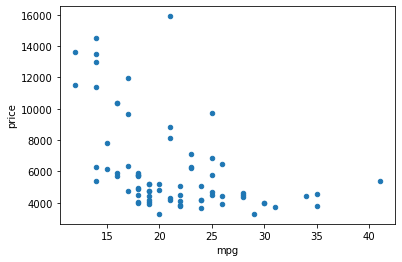

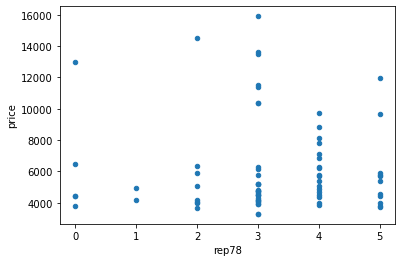

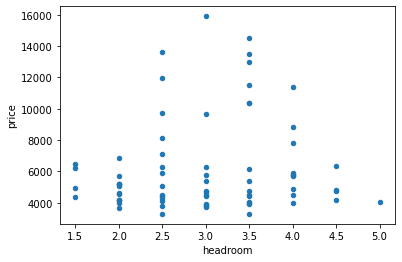

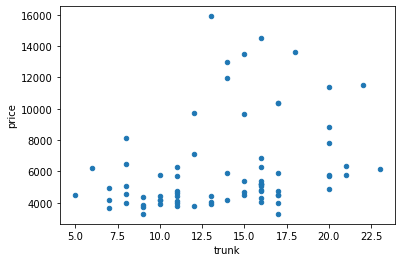

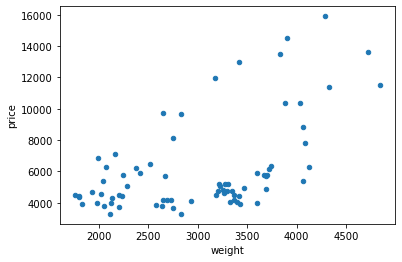

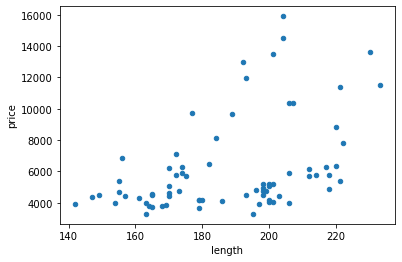

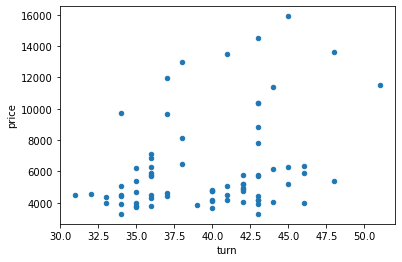

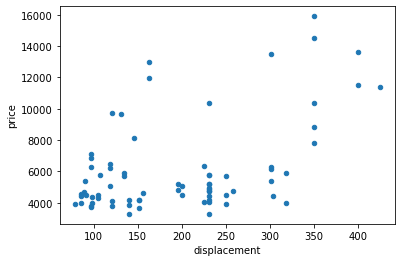

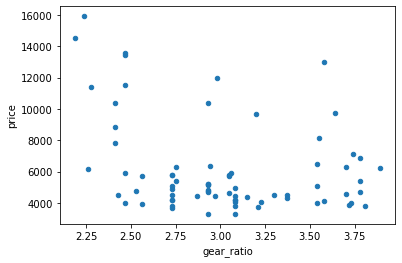

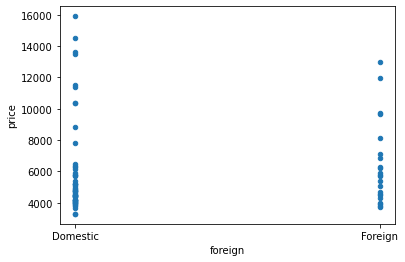

In [12]:
for clmn_name in df.columns:
    if clmn_name not in ['make', 'price']:
        df.plot.scatter(x = clmn_name, y = 'price')        
        plt.show()

Исходя из графиков, можно выдвинуть следующие гипотезы:

- Чем больше пробег, тем меньше цена
- Чем больше размер багажника, тем больше цена
- Чем больше вес, тем больше цена автомобиля
- Вес и размер багажника коррелируют
- Чем больше длина, тем больше цена
- Вес и длина коррелируют
- Радиус разворота коррелирует с ценой только из-за того, что чем больше машина (больше вес) тем он больший.
- Чем больше объём двигателя, тем больше цена
- Чем больше предаточное число, тем меньше цена 
- Цена иностранных(привезенных) автомобилей меньше

Также можно сделать предположение о том, что цена зависит отмарки автомобиля (make), но анализировать по группам будет некорректно, так как частота очень мала.

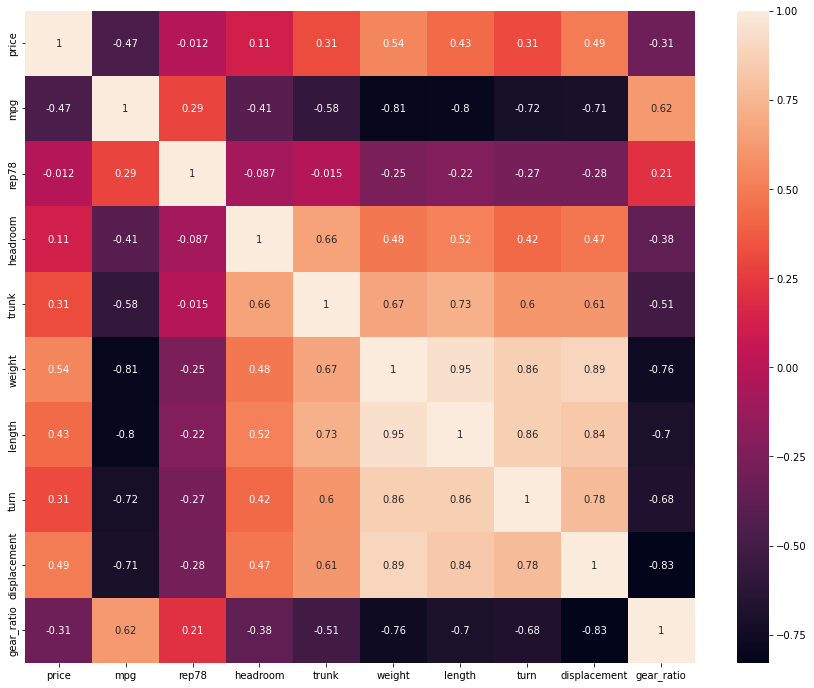

In [13]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Есть подтверждение нашим гипотезам.

### Первая версия модели

Попробуем засунуть всё как есть в модель: (без категоризации)

In [14]:
y = df['price']
x = np.hstack((np.ones((y.shape[0], 1)), df.drop(['price', 'make', 'foreign'], axis=1)))

model_first = sm.OLS(endog=y, exog=x).fit()
model_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     7.033
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.42e-07
Time:                        23:55:17   Log-Likelihood:                -670.27
No. Observations:                  74   AIC:                             1361.
Df Residuals:                      64   BIC:                             1384.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.142e+04   7037.872      1.622      0.110   -2640.835    2.55e+04
x1          -127.9877     79.277     -1.614      0.111    -286.361      30.386
x2           337.6756    223.516      1.511      0.136    -108.850     784.201
x3          -745.8565    417.580     -1.786      0.079   -1580.068      88.355
x4            68.7739    105.182      0.654      0.516    -141.351     278.899
x5             4.7661      1.351      3.527      0.001       2.066       7.466
x6           -81.9878     42.088     -1.948      0.056    -166.069       2.093
x7          -284.9762    123.986     -2.298      0.025    -532.666     -37.287
x8            13.8765      7.603      1.825      0.073      -1.313      29.066
x9          2409.5624   1038.176      2.321      0.023     335.567    4483.558
==============================================================================
Omnibus:                        9.052   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.697
Skew:                           0.732   Prob(JB):                       0.0129
Kurtosis:                       3.824   Cond. No.                     8.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видно, что некоторые переменные незначимы. Adj R_sq около 4,3.

### Вторая версия модели

Тут некоторые выводы взятые с занятия

In [15]:
df_for_model = pd.DataFrame()

df_for_model['price'] = np.log(df['price']) # в таком случае большая точность
df_for_model['mpg'] = 1/df['mpg'] # так как зависимость обратная
df_for_model = pd.concat([df_for_model, pd.get_dummies(df['rep78'].astype('Int64'), drop_first=True, prefix = 'rep')], axis = 1)
df_for_model['headroom'] = df['headroom']
df_for_model['trunk'] = df['trunk']
df_for_model['weight'] = df['weight']
df_for_model['length'] = df['length']
df_for_model['turn'] = df['turn']
df_for_model['displacement'] = df['displacement']
df_for_model['gear_ratio'] = df['gear_ratio']
df_for_model['gear_ratio_sqr'] = df['gear_ratio']**2 # хотим дополнительно посмотреть на данный признак
df_for_model = pd.concat([df_for_model, pd.get_dummies(df['foreign'], drop_first=True)], axis = 1) # чтобы преобразовать в количественный

model_cars = smf.ols(
    'price ~ mpg+rep_1+rep_2+rep_3+rep_4+rep_5+headroom+trunk+weight+length+turn+displacement+gear_ratio+gear_ratio_sqr+Foreign ', 
    data = df_for_model
)

In [16]:
model_cars = model_cars.fit()
model_cars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     8.268
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.35e-09
Time:                        23:55:17   Log-Likelihood:                 7.0986
No. Observations:                  74   AIC:                             17.80
Df Residuals:                      58   BIC:                             54.67
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.4348      1.835      6.777      0.000       8.762      16.108
mpg                8.8785      5.173      1.716      0.091      -1.477      19.234
rep_1             -0.2575      0.223     -1.155      0.253      -0.704       0.189
rep_2             -0.1305      0.165     -0.789      0.434      -0.462       0.201
rep_3             -0.1546      0.132     -1.168      0.248      -0.420       0.110
rep_4             -0.1349      0.139     -0.970      0.336      -0.413       0.144
rep_5             -0.0402      0.163     -0.246      0.806      -0.367       0.286
headroom          -0.1070      0.048     -2.208      0.031      -0.204      -0.010
trunk              0.0079      0.013      0.627      0.533      -0.017       0.033
weight             0.0005      0.000      2.890      0.005       0.000       0.001
length            -0.0026      0.005     -0.510      0.612      -0.013       0.008
turn              -0.0271      0.016     -1.718      0.091      -0.059       0.004
displacement       0.0003      0.001      0.258      0.797      -0.002       0.002
gear_ratio        -2.6077      1.175     -2.220      0.030      -4.959      -0.257
gear_ratio_sqr     0.4258      0.185      2.296      0.025       0.055       0.797
Foreign            0.3107      0.133      2.339      0.023       0.045       0.577
==============================================================================
Omnibus:                        3.072   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.712
Skew:                           0.373   Prob(JB):                        0.258
Kurtosis:                       2.431   Cond. No.                     5.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Тут мы пронаблюдали некоторые заисимости и попробовали преобразовать некоторые переменные, далее на всех данных, кроме столбца make обучили модель.

Получили лучшее значение метрик, но также остались незначимые признаки.

In [17]:
model_cars_pruned = smf.ols(
    'price ~ mpg+headroom+weight+turn+gear_ratio+gear_ratio_sqr+Foreign ', 
    data = df_for_model
).fit()
model_cars_pruned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     18.58
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.97e-13
Time:                        23:55:18   Log-Likelihood:                 5.0723
No. Observations:                  74   AIC:                             5.855
Df Residuals:                      66   BIC:                             24.29
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.4286      1.460      8.512      0.000       9.513      15.344
mpg                9.6115      4.687      2.051      0.044       0.254      18.969
headroom          -0.0875      0.038     -2.311      0.024      -0.163      -0.012
weight             0.0004      0.000      4.196      0.000       0.000       0.001
turn              -0.0325      0.013     -2.444      0.017      -0.059      -0.006
gear_ratio        -2.7272      0.883     -3.087      0.003      -4.491      -0.963
gear_ratio_sqr     0.4406      0.144      3.051      0.003       0.152       0.729
Foreign            0.3346      0.106      3.150      0.002       0.122       0.547
==============================================================================
Omnibus:                        3.370   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                3.154
Skew:                           0.436   Prob(JB):                        0.207
Kurtosis:                       2.488   Cond. No.                     5.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все признаки значимые при alpha = 5%, регрессия в целом тоже значимая, значение метрик лучше, чем в предыдущих моделях.

Мы взяли и почему:
- mpg (пробег) очень логично, что пробег влияет на цену
- headroom (габаритная высота), gear_ratio_sqr (предаточное число), foreing (происхождения автомобиля) заметили корреляцию на этапе EDA
- weight (вес) взяли потому что косвенно показывает нам габариты машины
- gear_ratio (предаточное число), turn (радиус разворота) берем потому что появвляется проблема с эндогенностью (не берем то, что нужно)

Коэффициенты у переменных получились примерно такими как и ожидались, только у признака Foreign ожидался коэффициент отрицательный. Также и у признака headroom, но в другую сторону. 

До этого ожидалось, что коэффициент у weight будет больше, но он получился малым так как я не подумал о том, что есть более новые машины, которые облегчают вес (думал про грузовики и легковые до этого), а также малым он оказался потому что мы не масштабировали признаки и сами значения в этом столбце велики.

Совсем непонтен коэффициент у turn. До этого предполагалось, что данный признак не нужен, так как он сильно коррелирует с weight, возможно модель завышает коэф у weight и знаижает у turn.

Мы прошли некоторые прдпосылки теоремы Г.М., какие могут быть нарушения:
- Мультиколлинеарность
- Гетероскедастичность
- Модель может быть нелинейна 
- Пропуск существенного регрессора
- Неоднородность исследуемых объектов
- и другие

В подсказках к модели пишется, что мы столкнулись с мультколлинеарностью, также неисключено, что есть гетерскедастичность. С линейностью/не линейностью мы всяко столкнулись, потому что присутствуют, например, как gear_ratio так и gear_ratio_sqr. Есть очень большая вероятность, что мы пропустили регрессоры.

По опыту прошлого задания, я думаю, что если мы будем сильно зациклены на препослыках, тогда мы получим очень малое количество признаков в модели, также значение метрик будет сильно меньше, поэтому, наверное, гнаться за всеми препослыками не стоит.